# Will you be mAI Doc?

**Automated X-ray Anomaly Detection**

A Deep Learning Project by M.C. Bargo, G.K. Fontanilla, C. Rivero, and R.R. Vy | MSDS 2020

**Abstract**

This work makes use of a convolutional neural network (CNN) in order to classify chest X-ray images for the presence of pneumonia. The model was trained on a dataset composed of 5,863 chest X-ray images from pediatric patients in Guangzhou Women and Children's Medical Center. After 40 epochs of training, the CNN model was able to achieve 93% test accuracy for determining the presence or absence of pneumonia. While the recall obtained for pneumonia-positive is already high at 92%, future improvements can still be done in the model to further prevent cases of false negatives.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Methodology</a></span><ul class="toc-item"><li><span><a href="#Pre-processing-and-Exploratory-Analysis" data-toc-modified-id="Pre-processing-and-Exploratory-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pre-processing and Exploratory Analysis</a></span></li><li><span><a href="#CNN-Classification" data-toc-modified-id="CNN-Classification-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CNN Classification</a></span><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Training/Validation-Image-Data-Generator" data-toc-modified-id="Training/Validation-Image-Data-Generator-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Training/Validation Image Data Generator</a></span></li><li><span><a href="#2D-CNN-Model-Architecture" data-toc-modified-id="2D-CNN-Model-Architecture-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>2D CNN Model Architecture</a></span></li></ul></li></ul></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results and Discussion</a></span><ul class="toc-item"><li><span><a href="#Model-Fitting-and-Evaluation-(First-20-Epochs)" data-toc-modified-id="Model-Fitting-and-Evaluation-(First-20-Epochs)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model Fitting and Evaluation (First 20 Epochs)</a></span></li><li><span><a href="#Model-Fitting-and-Evaluation-(21st-to-40th-Epochs)" data-toc-modified-id="Model-Fitting-and-Evaluation-(21st-to-40th-Epochs)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model Fitting and Evaluation (21st to 40th Epochs)</a></span></li><li><span><a href="#Saving-Model-Weights-and-Architecture" data-toc-modified-id="Saving-Model-Weights-and-Architecture-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Saving Model Weights and Architecture</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Introduction

Pneumonia is a disease that affects the lungs, causing fever and mucus buildup that is very uncomfortable to those afflicted. Young children and senior citizens are particularly vulnerable to this disease. Despite the availability of treatment for this disease, many people around the world still die from it, and it is the third deadliest disease in the Philippines next to heart ailments and cancer (Herriman, 2018). It is highly recommended to immediately see a doctor, especially for people who are in the high-risk group.

A chest X-ray is the most common tool used for diagnosing pneumonia. In general, chest X-rays are still considered as the primary diagnostic tool for respiratory pathology. Although computed tomography (CT) is the most accurate method for chest imaging, it has failed to surpass X-ray as the primary imaging test due to its high costs, levels of exposure, length of time to use, and difficulty to access. Unfortunately, chest X-ray results cannot independently rule-in or rule-out pulmonary diseases. A study has shown that in detecting pneumonia, the findings of X-rays and CT scans are in agreement only 90.2% of the time (Self et. al., 2013). This means that reliance on chest X-rays may lead to significant rates of misdiagnosis.

In this work, we will utilize deep learning to classify whether a chest X-ray image comes from a healthy patient or someone afflicted with pneumonia. Similar work has been done by Kermany et. al. to classify images for macular degeneration and diabetic retinopathy. (Kermany et. al., 2018). We will train the deep learning model using 5,863 chest X-ray images from selected pediatric patients (one to five years old) in Guangzhou Women and Children's Medical Center in Guangzhou, China (Kermany and Goldbaum, 2018). The X-rays are all of the anterior-posterior type and classified under two categories: normal and pneumonia. This dataset is available in Kaggle (Mooney, n.d.).

## Methodology

In this work, we will be using a convolutional neural network, the most successful of all types of neural networks. A <i>convolutional neural network</i> (CNN) is a type of deep learning algorithm that makes use of a sliding convolutional window on each layer to extract and learn from the data. This type of neural network is particularly good in learning the spatial features of data like images because the convolutional layers each learn an intricate feature of the data which is propagated to the next layer. These layers also conduct dimensionality reduction which reduces the size of the data without compromising much of the information. They are used widely for image recognition, object detection and localization, and even in text processing (Aggarwal, 2018). The performance of these networks has recently exceeded that of humans in the problem of image classification (He, Zhang, Ren, and Sun, 2016).

### Pre-processing and Exploratory Analysis

We first import the necessary packages we need to implement CNN on the pneumonia dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import json
import os
import random
import shutil


from io import BytesIO
from skimage import io
from urllib.request import urlopen
from zipfile import ZipFile

%matplotlib inline

We now download and extract the data from [Kaggle](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) (zip file) into working directory.

In [148]:
# Data Source: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
data_path = 'https://storage.googleapis.com/kaggle-data-sets/17810/23812/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1577257937&Signature=X6p07TTbapbtaGBfci1f4tw0afrfFBCpISjd0ae593w%2FZJg76ye7DCLUpTBM7NIjAr23XcTZeM3oNYfbftuhVysNRNnnmzNk0jUtmCI4sg6I7Ub%2FlgK2OesQSfA%2FjcJC9p%2FjEdJ5vjeNsd8b%2FTAj7AouYy%2BC%2BWab8XCIhzQfEXojRgn692sB85XJWNpiQ8ayi7eJ66V6ko%2Fp6AYqiK74pyQLGwfJHbmONP1Zt6pd7CG%2BpgSXs3LJ7UvxzjqY5U74shgz0AyGDF92PAxAqWaV06rlZ6c5JXcf3JArwNBkRmKZaFlAsLS8Dd5Eks8Ovh%2F81DgSMR9SYe8XkqyyhN0ltg%3D%3D&response-content-disposition=attachment%3B+filename%3Dchest-xray-pneumonia.zip'
with urlopen(data_path) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall()

The cells below explore the contents of the folder downloaded from Kaggle. There are 5,863 chest X-ray images included in this dataset, and we look at the distribution of those labeled `Normal` and those that are labeled `Afflicted`.

In [135]:
glob.glob('chest_xray/chest_xray/*/*/')

['chest_xray/chest_xray/train/NORMAL/',
 'chest_xray/chest_xray/train/PNEUMONIA/',
 'chest_xray/chest_xray/test/NORMAL/',
 'chest_xray/chest_xray/test/PNEUMONIA/',
 'chest_xray/chest_xray/val/NORMAL/',
 'chest_xray/chest_xray/val/PNEUMONIA/']

In [214]:
raw_normal = dict()
for subset in ['train', 'test', 'val']:
    raw_normal[subset] = sorted(glob.glob(f'chest_xray/chest_xray/{subset}/NORMAL/*.jpeg'))

raw_afflicted = dict()
for subset in ['train', 'test', 'val']:
    raw_afflicted[subset] = sorted(glob.glob(f'chest_xray/chest_xray/{subset}/PNEUMONIA/*.jpeg'))

In [244]:
print('Number of images per set in raw data:')
print()
for key, values in raw_normal.items():
    print(f'Normal - {key} - {len(values)}')
print()
for key, values in raw_afflicted.items():
    print(f'Afflicted - {key} - {len(values)}')

Number of images per set in raw data:

Normal - train - 1341
Normal - test - 234
Normal - val - 8

Afflicted - train - 3875
Afflicted - test - 390
Afflicted - val - 8


We then proceed to reshuffling the images to increase the data in the validation set. Since there are only 8 images for validation folder in the raw data distribution, the normal and afflicted images are pooled together separately then randomly redistributed to the train (and validation) and test sets. Note that in `tensorflow.keras`, the validation data is read from the `train` subfolder.

We partition the dataset so that 80% of the images are in the train and validation sets, while the remaining 20% of the images are in the test set.

In [202]:
# Pooling of images
normal_imgs = list(pd.core.common.flatten(raw_normal.values()))
afflicted_imgs = list(pd.core.common.flatten(raw_afflicted.values()))

In [226]:
# Random Redistribution
random.seed(123)
train_normal_imgs = random.sample(normal_imgs, int(np.rint(0.8*len(normal_imgs))))
test_normal_imgs = list(set(normal_imgs) - set(train_normal_imgs))

random.seed(123)
train_afflicted_imgs = random.sample(afflicted_imgs, int(np.rint(0.8*len(afflicted_imgs))))
test_afflicted_imgs = list(set(afflicted_imgs) - set(train_afflicted_imgs))

In [227]:
# Redistribute images into physical folders
sources = [train_normal_imgs, test_normal_imgs,
           train_afflicted_imgs, test_afflicted_imgs]

destination = ['images/train/NORMAL', 'images/test/NORMAL',
               'images/train/PNEUMONIA', 'images/test/PNEUMONIA']

for s,d in zip(sources, destination):
    try:
        os.makedirs(d)
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")
    for img in s:
        shutil.copy(img, d)

In [241]:
# Save the exact paths and images used for model training
reshuffled = dict()
for s,d in zip(sources, destination):
    reshuffled[d] = s

with open('reshuffled.json', 'w') as f:
    json.dump(reshuffled, f)

We now look at the distribution of chest X-ray images after reshuffling.

In [242]:
for key, values in reshuffled.items():
    print(f'{key} - {len(values)}')

images/train/NORMAL - 1266
images/test/NORMAL - 317
images/train/PNEUMONIA - 3418
images/test/PNEUMONIA - 855


Refer to the cell below for the distribution of data that will be used in our analysis. We also compute the proportion chance criterion (PCC) to set the baseline for our CNN analysis later.

In [268]:
Ntrain, Ntest, Ptrain, Ptest = tuple(len(vals) for vals in reshuffled.values())
total = sum([Ntrain, Ntest, Ptrain, Ptest])
total_train = sum([Ntrain, Ptrain])
total_test = sum([Ntest, Ptest])
print(f'Total Number of Images = {total}')
print(f'Fraction Afflicted with Pneumonia = {(Ptrain+Ptest)/total:0.2f}')
print(f'Train Set 1.25*PCC = {1.25*((Ptrain/total_train)**2 + (Ntrain/total_train)**2):0.1%}')
print(f'Test Set 1.25*PCC = {1.25*((Ptest/total_test)**2 + (Ntest/total_test)**2):0.1%}')

Total Number of Images = 5856
Fraction Afflicted with Pneumonia = 0.73
Train Set 1.25*PCC = 75.7%
Test Set 1.25*PCC = 75.7%


We take a sample image from those who are classified as `Normal` and another sample image from those who are classified as `Afflicted`. We look at these images side-by-side to see the difference between the normal and the afflicted chest X-ray images.

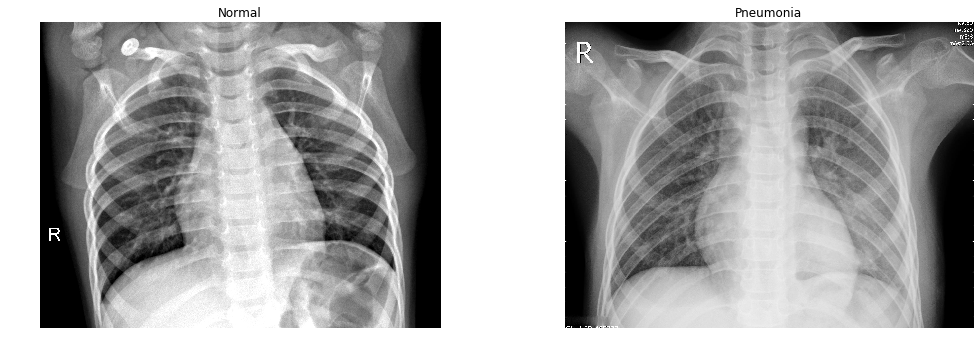

In [299]:
random.seed(42)
samp_normal = random.sample(glob.glob('images/train/NORMAL/*.jpeg'), 1)[0]
samp_afflicted = random.sample(glob.glob('images/train/PNEUMONIA/*.jpeg'), 1)[0]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
io.imshow(io.imread(samp_normal), ax=ax1)
ax1.set_title('Normal')
ax1.axis('off')
io.imshow(io.imread(samp_afflicted), ax=ax2)
ax2.set_title('Pneumonia')
ax2.axis('off');

### CNN Classification

In this section, we discuss in detail how the CNN architecture was built in order for us to train our dataset to detect X-ray images afflicted with pneumonia.

#### Preliminaries 

In the field of Deep Learning, the ‘learning rate’ hyperparameter  can be considered the most important of them all. It is the hyperparameter that allows the model to reach the highest accuracy upon convergence, or the minimum error that the model can possibly achieve relative to the number of epochs the user has set. A learning rate too small may result to a long training process and one that is too large may result into a volatile training process. Thus, a user usually has to experiment with different learning rates in training a model which could be quite laborious (Brownlee, 2019). 

To reduce the time spent on learning rate selection, the Keras library has an option to apply learning rate schedules using the `callbacks`. This subclass is meant to provide specific functionalities, with a set of methods called at various stages of training, testing, and prediction. Callbacks are useful to check internal states and statistics of the model during training (<i>Keras custom callbacks</i>, n.d.).

The following important callbacks are used in `tensorflow.keras` for model training:
1. Use of adaptive learning rate (`ReduceLROnPlateau` method)
2. Model will be saved only if the validation loss improves (`ModelCheckpoint(save_best_only=True)` method)


When used with the proper inputs, the `ReduceLRonPlateau(`)  command may increase the learning rate iteratively after a given amount of epochs called `patience` by a `factor` which is also a user-input. This allows the model to adjust the learning rate while training instead of having to rely on only a constant rate. Upon reaching a pateau of accuracy/loss, the command activates the callback, which then reduces the learning rate. The use of adaptive learning rate thus allows the model to converge faster while actively steering the model away from the vanishing gradient problem, and to reach an even greater accuracy (Brownlee, 2019). 

We define the custom callbacks in the cells below.

In [1]:
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import callbacks

In [300]:
# Setup global variables for fitting model
batch_size = 32
dims = 256
epochs = 100

# Setup global variables for saving model
best_weights = 'best_weights.hdf5'
model_architecture = 'model_architecture.json'

# Callbacks
checkpoint = callbacks.ModelCheckpoint(filepath=best_weights, save_best_only=True, verbose=1)
lr_reduce = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, verbose=2, mode='max')
# early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

We now prepare the files that will be used for model evaluation. We label these files and reshuffle the images in preparation for implementation.

In [304]:
# Pool together normal and afflicted test images
files = glob.glob('images/test/NORMAL/*.jpeg') + glob.glob('images/test/PNEUMONIA/*.jpeg')

# Label normal test images as 0 and afflicted test images as 1
labels = [0]*len(glob.glob('images/test/NORMAL/*.jpeg')) + [1]*len(glob.glob('images/test/PNEUMONIA/*.jpeg'))

# Shuffle order of test images
test_temp =list(zip(files,labels))
random.seed(123)
random.shuffle(test_temp)

# Save the filepaths into `test_files` and labels into `y_test`
test_files, labels = zip(*test_temp)
y_test = np.array(labels)

We compute the proportion chance criterion (PCC) that will serve as a baseline for evaluation of our model. We need to beat this PCC value in order to say we have a good classifier model.

In [305]:
def get_pcc(y):
    ones = sum(y)
    length = len(y)
    return (ones/length)**2 + ((length-ones)/length)**2

In [307]:
test_pcc = get_pcc(y_test)
print(f'Test set PCC = {test_pcc:0.1%}')
print(f'Test set 1.25*PCC = {1.25*test_pcc:0.1%}')

Test set PCC = 60.5%
Test set 1.25*PCC = 75.7%


#### Training/Validation Image Data Generator

Augmented training data were generated using `ImageDataGenerator` of `tensorflow.keras`, with a validation split of 25%. The images were read into memory as 256x256 numeric arrays, with values scaled to range [0,1] since CNN handles smaller values better.

In [4]:
train_datagen = image.ImageDataGenerator(rescale=1./255, 
                                         zoom_range = 0.3,
                                         vertical_flip = True,
                                         validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join('images','train'),
    target_size=(dims, dims),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size,
    seed=123,
    subset='training'
    )

validation_generator = train_datagen.flow_from_directory(
    directory=os.path.join('images','train'),
    target_size=(dims, dims),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size,
    seed=123,
    subset='validation'
    )

Found 3514 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.


#### 2D CNN Model Architecture

The convolutional neural network used here is composed of 5 convolutional blocks with 3 hidden dense layers and an Adam optimizer. This is a modified version of the architecture used by Lubiński (Lubiński, n.d.). In this work, we divide the images into 3 sets: training set, validation set, and the test set. The validation set serves as an early estimate to the accuracy of the model on the test set and helps us tune the parameters of the neural network.

In [5]:
# First conv block
model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(dims,dims,1)))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Second conv block
model.add(layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Third conv block
model.add(layers.SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Fourth conv block
model.add(layers.SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.2))

# Fifth conv block
model.add(layers.SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.2))

# FC layer
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dropout(rate=0.3))

# Output layer
model.add(layers.Dense(units=1, activation='sigmoid'))

# Creating model and compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
          
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 128, 128, 32)      688       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 128, 128, 32)      1344      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0

## Results and Discussion

We now train the CNN architecture we built in the previous section on our chest X-ray image dataset. We first tried implementing 20 epochs and assess the accuracy of the model. We then tested adding 20 more epochs to see if the model can be improved further.

### Model Fitting and Evaluation (First 20 Epochs)

In the cell below, we use the training set to build our CNN model for 20 epochs.

In [11]:
temp = model.fit_generator(
           train_generator, steps_per_epoch=train_generator.samples // batch_size, 
           epochs=20,
           validation_data=validation_generator, 
           validation_steps=validation_generator.samples // batch_size,
           callbacks=[checkpoint, lr_reduce])

Epoch 1/20
109/109 [==============================] - 220s 2s/step - loss: 0.3438 - accuracy: 0.8472 - val_loss: 0.6252 - val_accuracy: 0.7326
Epoch 2/20
109/109 [==============================] - 221s 2s/step - loss: 0.3285 - accuracy: 0.8469 - val_loss: 0.5944 - val_accuracy: 0.7326
Epoch 3/20
108/109 [============================>.] - ETA: 1s - loss: 0.3126 - accuracy: 0.8675
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
109/109 [==============================] - 221s 2s/step - loss: 0.3124 - accuracy: 0.8676 - val_loss: 0.5738 - val_accuracy: 0.7326
Epoch 4/20
109/109 [==============================] - 221s 2s/step - loss: 0.2883 - accuracy: 0.8779 - val_loss: 0.8879 - val_accuracy: 0.7326
Epoch 5/20
109/109 [==============================] - 225s 2s/step - loss: 0.2499 - accuracy: 0.9006 - val_loss: 0.3919 - val_accuracy: 0.7691
Epoch 6/20
109/109 [==============================] - 219s 2s/step - loss: 0.2423 - accuracy: 0.8998 - val_loss: 0.8389 

We now plot the accuracy of the training and validation sets per epoch. We also look at the training and validation loss per epoch.

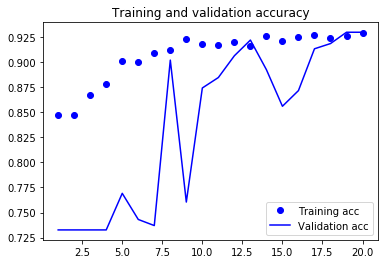

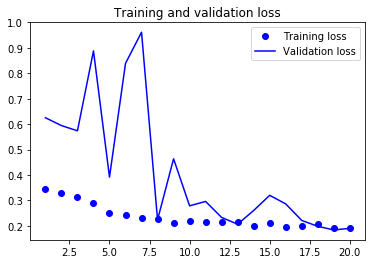

In [13]:
acc = temp.history['accuracy']
val_acc = temp.history['val_accuracy']
loss = temp.history['loss']
val_loss = temp.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We now evaluate our model on the test set and observe the accuracy of the model.

In [34]:
print(f'Test files = {len(test_files)}')
j = 0
y_pred = np.zeros(len(test_files))
for f in test_files:
    img = image.load_img(f, target_size=(dims, dims), color_mode='grayscale')
    x = image.img_to_array(img)/255
    x = np.expand_dims(x, axis=0)
    res = np.rint(model.predict(x))
    y_pred[j] = res
    print(j, res)
    j+=1

Test files = 1172
0 [[1.]]
1 [[1.]]
2 [[1.]]
3 [[0.]]
4 [[0.]]
5 [[1.]]
6 [[1.]]
7 [[0.]]
8 [[0.]]
9 [[1.]]
10 [[1.]]
11 [[0.]]
12 [[0.]]
13 [[0.]]
14 [[1.]]
15 [[1.]]
16 [[1.]]
17 [[1.]]
18 [[1.]]
19 [[1.]]
20 [[0.]]
21 [[1.]]
22 [[1.]]
23 [[1.]]
24 [[1.]]
25 [[0.]]
26 [[1.]]
27 [[1.]]
28 [[0.]]
29 [[1.]]
30 [[1.]]
31 [[1.]]
32 [[1.]]
33 [[0.]]
34 [[1.]]
35 [[1.]]
36 [[0.]]
37 [[1.]]
38 [[1.]]
39 [[1.]]
40 [[1.]]
41 [[1.]]
42 [[1.]]
43 [[0.]]
44 [[0.]]
45 [[0.]]
46 [[1.]]
47 [[0.]]
48 [[1.]]
49 [[1.]]
50 [[1.]]
51 [[1.]]
52 [[1.]]
53 [[0.]]
54 [[0.]]
55 [[1.]]
56 [[1.]]
57 [[0.]]
58 [[1.]]
59 [[1.]]
60 [[1.]]
61 [[0.]]
62 [[0.]]
63 [[1.]]
64 [[1.]]
65 [[1.]]
66 [[1.]]
67 [[1.]]
68 [[1.]]
69 [[0.]]
70 [[1.]]
71 [[1.]]
72 [[1.]]
73 [[1.]]
74 [[1.]]
75 [[1.]]
76 [[1.]]
77 [[1.]]
78 [[1.]]
79 [[1.]]
80 [[1.]]
81 [[0.]]
82 [[1.]]
83 [[1.]]
84 [[1.]]
85 [[1.]]
86 [[0.]]
87 [[1.]]
88 [[0.]]
89 [[1.]]
90 [[1.]]
91 [[1.]]
92 [[0.]]
93 [[1.]]
94 [[0.]]
95 [[1.]]
96 [[0.]]
97 [[1.]]
98 [[1.]]
99

754 [[0.]]
755 [[1.]]
756 [[1.]]
757 [[1.]]
758 [[1.]]
759 [[0.]]
760 [[1.]]
761 [[1.]]
762 [[1.]]
763 [[0.]]
764 [[0.]]
765 [[0.]]
766 [[0.]]
767 [[0.]]
768 [[1.]]
769 [[0.]]
770 [[1.]]
771 [[0.]]
772 [[1.]]
773 [[1.]]
774 [[1.]]
775 [[1.]]
776 [[1.]]
777 [[1.]]
778 [[0.]]
779 [[0.]]
780 [[1.]]
781 [[1.]]
782 [[1.]]
783 [[1.]]
784 [[0.]]
785 [[1.]]
786 [[0.]]
787 [[0.]]
788 [[1.]]
789 [[1.]]
790 [[1.]]
791 [[0.]]
792 [[0.]]
793 [[1.]]
794 [[1.]]
795 [[0.]]
796 [[1.]]
797 [[1.]]
798 [[1.]]
799 [[0.]]
800 [[1.]]
801 [[1.]]
802 [[1.]]
803 [[1.]]
804 [[1.]]
805 [[1.]]
806 [[1.]]
807 [[0.]]
808 [[0.]]
809 [[0.]]
810 [[1.]]
811 [[1.]]
812 [[1.]]
813 [[1.]]
814 [[1.]]
815 [[1.]]
816 [[1.]]
817 [[1.]]
818 [[0.]]
819 [[1.]]
820 [[1.]]
821 [[0.]]
822 [[1.]]
823 [[0.]]
824 [[1.]]
825 [[1.]]
826 [[1.]]
827 [[0.]]
828 [[1.]]
829 [[1.]]
830 [[0.]]
831 [[1.]]
832 [[1.]]
833 [[1.]]
834 [[1.]]
835 [[0.]]
836 [[1.]]
837 [[0.]]
838 [[1.]]
839 [[1.]]
840 [[0.]]
841 [[1.]]
842 [[1.]]
843 [[1.]]
844 [[1.]]

In [40]:
print(classification_report(y_test, y_pred))
print(f'Matthews Correlation Coefficient = {np.round(matthews_corrcoef(y_test, y_pred),2)}')

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       317
           1       0.98      0.91      0.95       855

    accuracy                           0.92      1172
   macro avg       0.89      0.94      0.91      1172
weighted avg       0.93      0.92      0.93      1172

Matthews Correlation Coefficient = 0.83


The classification accuracy achieved is pretty high at 92% after 20 epochs of training. The model also proved to be robust to class imbalance (as 73% of the data is labeled positive with pneumonia) since the Matthews Correlation Coefficient (MCC) achieved is 0.83. The MCC has a range of -1 to 1, where -1 indicates a completely wrong binary classifier while 1 indicates a completely correct binary classifier. The MCC is generally regarded as a balanced measure for binary classification as it gives equal importance to both classes regardless if they have very different sizes. 

Furthermore, the model generated impressive precision score on the `Afflicted` class, as 98% of those classified as `Afflicted` by the model are indeed afflicted by pneumonia. Unfortunately, the precision score of those in the `Normal` class is not very high at 80%, which means quite a number of patients afflicted with pneumonia were misclassified as `Normal`. This is reflected by the recall score of the `Afflicted` class, where only 91% of those afflicted with pneumonia were identified by the model. The `Normal` class, on the other hand, shows a high recall score of 96%.

### Model Fitting and Evaluation (21st to 40th Epochs)

To see if the results could still improve using more epochs, the fitting was continued using 20 more epochs.

In [41]:
temp2 = model.fit_generator(
           train_generator, steps_per_epoch=train_generator.samples // batch_size, 
           epochs=20,
           validation_data=validation_generator, 
           validation_steps=validation_generator.samples // batch_size,
           callbacks=[checkpoint, lr_reduce])

Epoch 1/20
108/109 [============================>.] - ETA: 1s - loss: 0.1930 - accuracy: 0.9275
Epoch 00001: val_loss improved from inf to 0.19271, saving model to best_weights.hdf5
109/109 [==============================] - 185s 2s/step - loss: 0.1935 - accuracy: 0.9271 - val_loss: 0.1927 - val_accuracy: 0.9236
Epoch 2/20
108/109 [============================>.] - ETA: 1s - loss: 0.1977 - accuracy: 0.9246
Epoch 00002: val_loss improved from 0.19271 to 0.18225, saving model to best_weights.hdf5
109/109 [==============================] - 184s 2s/step - loss: 0.1967 - accuracy: 0.9250 - val_loss: 0.1823 - val_accuracy: 0.9227
Epoch 3/20
108/109 [============================>.] - ETA: 1s - loss: 0.1938 - accuracy: 0.9238
Epoch 00003: val_loss did not improve from 0.18225

Epoch 00003: ReduceLROnPlateau reducing learning rate to 7.289999985005124e-07.
109/109 [==============================] - 184s 2s/step - loss: 0.1934 - accuracy: 0.9239 - val_loss: 0.1906 - val_accuracy: 0.9236
Epoch 4/

We plot the training and validation accuracy and loss, this time for epochs 1 up to 40.

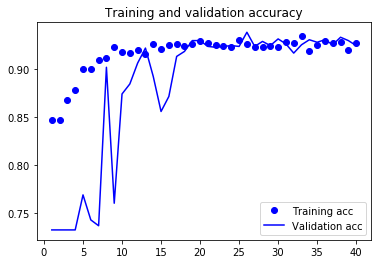

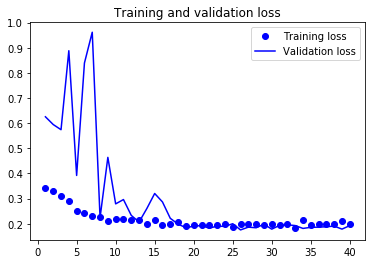

In [42]:
acc = temp.history['accuracy'] + temp2.history['accuracy']
val_acc = temp.history['val_accuracy'] + temp2.history['val_accuracy']
loss = temp.history['loss'] + temp2.history['loss']
val_loss = temp.history['val_loss'] + temp2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We once again perform the evaluation on our test set and compare it with the results using only 20 training epochs.

In [43]:
print(f'Test files = {len(test_files)}')
j = 0
y_pred = np.zeros(len(test_files))
for f in test_files:
    img = image.load_img(f, target_size=(dims, dims), color_mode='grayscale')
    x = image.img_to_array(img)/255
    x = np.expand_dims(x, axis=0)
    res = np.rint(model.predict(x))
    y_pred[j] = res
    print(j, res)
    j+=1

Test files = 1172
0 [[1.]]
1 [[1.]]
2 [[1.]]
3 [[0.]]
4 [[0.]]
5 [[1.]]
6 [[1.]]
7 [[0.]]
8 [[0.]]
9 [[1.]]
10 [[1.]]
11 [[0.]]
12 [[0.]]
13 [[0.]]
14 [[1.]]
15 [[1.]]
16 [[1.]]
17 [[1.]]
18 [[1.]]
19 [[1.]]
20 [[0.]]
21 [[1.]]
22 [[1.]]
23 [[1.]]
24 [[1.]]
25 [[0.]]
26 [[1.]]
27 [[1.]]
28 [[0.]]
29 [[1.]]
30 [[1.]]
31 [[1.]]
32 [[1.]]
33 [[0.]]
34 [[1.]]
35 [[1.]]
36 [[0.]]
37 [[1.]]
38 [[1.]]
39 [[1.]]
40 [[1.]]
41 [[1.]]
42 [[1.]]
43 [[0.]]
44 [[0.]]
45 [[0.]]
46 [[1.]]
47 [[0.]]
48 [[1.]]
49 [[1.]]
50 [[1.]]
51 [[1.]]
52 [[1.]]
53 [[0.]]
54 [[0.]]
55 [[1.]]
56 [[1.]]
57 [[0.]]
58 [[1.]]
59 [[1.]]
60 [[1.]]
61 [[0.]]
62 [[0.]]
63 [[1.]]
64 [[1.]]
65 [[1.]]
66 [[1.]]
67 [[1.]]
68 [[1.]]
69 [[0.]]
70 [[1.]]
71 [[1.]]
72 [[1.]]
73 [[1.]]
74 [[1.]]
75 [[1.]]
76 [[1.]]
77 [[1.]]
78 [[1.]]
79 [[1.]]
80 [[1.]]
81 [[0.]]
82 [[1.]]
83 [[1.]]
84 [[1.]]
85 [[1.]]
86 [[0.]]
87 [[1.]]
88 [[0.]]
89 [[1.]]
90 [[1.]]
91 [[1.]]
92 [[0.]]
93 [[1.]]
94 [[0.]]
95 [[1.]]
96 [[0.]]
97 [[1.]]
98 [[1.]]
99

754 [[0.]]
755 [[1.]]
756 [[1.]]
757 [[1.]]
758 [[1.]]
759 [[0.]]
760 [[1.]]
761 [[1.]]
762 [[1.]]
763 [[0.]]
764 [[0.]]
765 [[0.]]
766 [[0.]]
767 [[0.]]
768 [[1.]]
769 [[0.]]
770 [[1.]]
771 [[0.]]
772 [[1.]]
773 [[1.]]
774 [[1.]]
775 [[1.]]
776 [[1.]]
777 [[1.]]
778 [[0.]]
779 [[0.]]
780 [[1.]]
781 [[1.]]
782 [[1.]]
783 [[1.]]
784 [[0.]]
785 [[1.]]
786 [[0.]]
787 [[0.]]
788 [[1.]]
789 [[1.]]
790 [[1.]]
791 [[1.]]
792 [[0.]]
793 [[1.]]
794 [[1.]]
795 [[0.]]
796 [[1.]]
797 [[1.]]
798 [[1.]]
799 [[0.]]
800 [[1.]]
801 [[1.]]
802 [[1.]]
803 [[1.]]
804 [[1.]]
805 [[1.]]
806 [[1.]]
807 [[0.]]
808 [[0.]]
809 [[0.]]
810 [[1.]]
811 [[1.]]
812 [[1.]]
813 [[1.]]
814 [[1.]]
815 [[1.]]
816 [[1.]]
817 [[1.]]
818 [[0.]]
819 [[1.]]
820 [[1.]]
821 [[0.]]
822 [[1.]]
823 [[0.]]
824 [[1.]]
825 [[1.]]
826 [[1.]]
827 [[0.]]
828 [[1.]]
829 [[1.]]
830 [[0.]]
831 [[1.]]
832 [[1.]]
833 [[1.]]
834 [[1.]]
835 [[0.]]
836 [[1.]]
837 [[0.]]
838 [[1.]]
839 [[1.]]
840 [[0.]]
841 [[1.]]
842 [[1.]]
843 [[1.]]
844 [[1.]]

In [44]:
from sklearn.metrics import classification_report, matthews_corrcoef
print(classification_report(y_test, y_pred))
print(f'Matthews Correlation Coefficient = {np.round(matthews_corrcoef(y_test, y_pred),2)}')

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       317
           1       0.98      0.91      0.95       855

    accuracy                           0.93      1172
   macro avg       0.90      0.94      0.91      1172
weighted avg       0.94      0.93      0.93      1172

Matthews Correlation Coefficient = 0.83


We did not see any improvements on the Matthews Correlation Coefficient with the addition of 20 more training epochs. We improved the accuracy of the model slightly (from 92% to 93%). We observe a slight improvement in the precision score of the `Normal` class, while the other precision and recall scores are the same as before.

We conclude the training of the model at 40 epochs given these miniscule improvements between the 20th and 40th training epochs.

### Saving Model Weights and Architecture

We now save the model weights and architecture for future use, in the case where we collect more data for analysis.

In [46]:
# Saving model architecture
with open(model_architecture, 'w') as f:
    f.write(model.to_json())

The weights of the best model was already saved `callback` parameter during fitting (`save_best_only=True`).

In [ ]:
# # Saving weights
# model.save(best_weights)

We test if we get the same results obtained before, but this time using the model architecture and model weights saved on the files `model_architecture.json` and `best_weights.hdf5`, respectively.

In [309]:
# Model reconstruction from JSON file
with open(model_architecture, 'r') as f:
    best_model = models.model_from_json(f.read())

# Loading weights from h5 file
best_model.load_weights(best_weights)

In [49]:
print(f'Test files = {len(test_files)}')
j = 0
y_pred = np.zeros(len(test_files))
for f in test_files:
    img = image.load_img(f, target_size=(dims, dims), color_mode='grayscale')
    x = image.img_to_array(img)/255
    x = np.expand_dims(x, axis=0)
    res = np.rint(best_model.predict(x))
    y_pred[j] = res
    print(j, res)
    j+=1

Test files = 1172
0 [[1.]]
1 [[1.]]
2 [[1.]]
3 [[0.]]
4 [[0.]]
5 [[1.]]
6 [[1.]]
7 [[0.]]
8 [[0.]]
9 [[1.]]
10 [[1.]]
11 [[0.]]
12 [[0.]]
13 [[0.]]
14 [[1.]]
15 [[1.]]
16 [[1.]]
17 [[1.]]
18 [[1.]]
19 [[1.]]
20 [[0.]]
21 [[1.]]
22 [[1.]]
23 [[1.]]
24 [[1.]]
25 [[0.]]
26 [[1.]]
27 [[1.]]
28 [[0.]]
29 [[1.]]
30 [[1.]]
31 [[1.]]
32 [[1.]]
33 [[0.]]
34 [[1.]]
35 [[1.]]
36 [[0.]]
37 [[1.]]
38 [[1.]]
39 [[1.]]
40 [[1.]]
41 [[1.]]
42 [[1.]]
43 [[0.]]
44 [[0.]]
45 [[0.]]
46 [[1.]]
47 [[0.]]
48 [[1.]]
49 [[1.]]
50 [[1.]]
51 [[1.]]
52 [[1.]]
53 [[0.]]
54 [[0.]]
55 [[1.]]
56 [[1.]]
57 [[0.]]
58 [[1.]]
59 [[1.]]
60 [[1.]]
61 [[0.]]
62 [[0.]]
63 [[1.]]
64 [[1.]]
65 [[1.]]
66 [[1.]]
67 [[1.]]
68 [[1.]]
69 [[0.]]
70 [[1.]]
71 [[1.]]
72 [[1.]]
73 [[1.]]
74 [[1.]]
75 [[1.]]
76 [[1.]]
77 [[1.]]
78 [[1.]]
79 [[1.]]
80 [[1.]]
81 [[0.]]
82 [[1.]]
83 [[1.]]
84 [[1.]]
85 [[1.]]
86 [[0.]]
87 [[1.]]
88 [[0.]]
89 [[1.]]
90 [[1.]]
91 [[1.]]
92 [[0.]]
93 [[1.]]
94 [[0.]]
95 [[1.]]
96 [[0.]]
97 [[1.]]
98 [[1.]]
99

755 [[1.]]
756 [[1.]]
757 [[1.]]
758 [[1.]]
759 [[0.]]
760 [[1.]]
761 [[1.]]
762 [[1.]]
763 [[0.]]
764 [[0.]]
765 [[0.]]
766 [[0.]]
767 [[0.]]
768 [[1.]]
769 [[0.]]
770 [[1.]]
771 [[0.]]
772 [[1.]]
773 [[1.]]
774 [[1.]]
775 [[1.]]
776 [[1.]]
777 [[1.]]
778 [[0.]]
779 [[0.]]
780 [[1.]]
781 [[1.]]
782 [[1.]]
783 [[1.]]
784 [[0.]]
785 [[1.]]
786 [[0.]]
787 [[0.]]
788 [[1.]]
789 [[1.]]
790 [[1.]]
791 [[1.]]
792 [[0.]]
793 [[1.]]
794 [[1.]]
795 [[0.]]
796 [[1.]]
797 [[1.]]
798 [[1.]]
799 [[0.]]
800 [[1.]]
801 [[1.]]
802 [[1.]]
803 [[1.]]
804 [[1.]]
805 [[1.]]
806 [[1.]]
807 [[0.]]
808 [[0.]]
809 [[0.]]
810 [[1.]]
811 [[1.]]
812 [[1.]]
813 [[1.]]
814 [[1.]]
815 [[1.]]
816 [[1.]]
817 [[1.]]
818 [[0.]]
819 [[1.]]
820 [[1.]]
821 [[0.]]
822 [[1.]]
823 [[0.]]
824 [[1.]]
825 [[1.]]
826 [[1.]]
827 [[0.]]
828 [[1.]]
829 [[1.]]
830 [[0.]]
831 [[1.]]
832 [[1.]]
833 [[1.]]
834 [[1.]]
835 [[0.]]
836 [[1.]]
837 [[0.]]
838 [[1.]]
839 [[1.]]
840 [[0.]]
841 [[1.]]
842 [[1.]]
843 [[1.]]
844 [[1.]]
845 [[1.]]

In [50]:
print(classification_report(y_test, y_pred))
print(f'Matthews Correlation Coefficient = {np.round(matthews_corrcoef(y_test, y_pred),2)}')

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       317
           1       0.98      0.92      0.95       855

    accuracy                           0.93      1172
   macro avg       0.90      0.94      0.91      1172
weighted avg       0.94      0.93      0.93      1172

Matthews Correlation Coefficient = 0.83


This now ensures that the model we ran is saved in `model_architecture.json`. We no longer need to rerun the cells from the beginning of this report in case we add more test images to our dataset.

## Conclusion

This work has shown that our convolutional neural network has achieved a 93% test classification accuracy when assessing chest X-ray images of pediatric patients for pneumonia. This result is better than the 90.2% assessment accuracy of a radiologist, as indicated by the work of Self et. al. However, more work has to be done in order to improve the precision score of the `Normal` class, to prevent cases of false negatives. Further studies could explore improving the model architecture, more tuning of the hyperparameters, or even increasing the number of training epochs.

Upon successful implementation of a model that would diagnose pneumonia in chest X-ray images, we hope that this study may be carried on by a research institute on the Philippines which would facilitate collection of chest X-ray images from Filipino youth and senior citizens. This may serve as a prerequisite to possible deployment of a digital application that may aid early diagnosis of pneumonia for doctors and health care professionals, especially in the far-flung regions where there is a lack of presence of doctors specializing in respiratory diseases.

## References

* Aggarwal, C.C. (2018). <i>Neural Networks and Deep Learning.</i> Springer International Publishing.
* Brownlee, J. (2019, December 6). Understand the Impact of Learning Rate on Neural Network Performance. Retrieved from: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/ 
* He, K., Zhang, X., Ren, S., and Sun, J. (2016). Deep residual learning for image recognition. In <i>Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition</i> (pp. 770-778).
* Herriman, R. (2018, November 4). Pneumonia is the 3rd biggest killer in the Philippines, accounting for 10 percent of deaths. Retrieved from http://outbreaknewstoday.com/pneumonia-3rd-biggest-killer-philippines-accounting-10-percent-deaths-91248/
* <i>Keras custom callbacks.</i> Retrieved from https://www.tensorflow.org/guide/keras/custom_callback
* Kermany, D.S., Goldbaum, M., Cai, W., Valentim, C.C.S, Liang, H., Baxter, S.L., McKeown, A., Yang, G., Wu, X., Yang, F., et. al. (2018). Identifying medical diagnoses and treatable diseases by image-based deep learning. <i>Cell, 172(5)</i>, 1122-1131.
* Kermany, D., and Goldbaum, M. (2018). Labeled optical coherence tomography (OCT) and Chest X-Ray images for classification. <i>Mendeley Data, 2</i>.
* Lubiński, P. (n.d.). Chest X-Ray Pneumonia - depthwise separable conv. Retrieved from https://www.kaggle.com/plubinski/chest-x-ray-pneumonia-depthwise-separable-conv
* Mooney, P. (n.d.). Chest X-Ray Images (Pneumonia). Retrieved from https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
* Self, W.H., Courtney, D.M., McNaughton, C.D., Wunderink, R.G., and Kline, J.A. (2013). High discordance of chest x-ray and computed tomography for detection of pulmonary opacities in ED patients: Implications for diagnosing pneumonia. <i>The American Journal of Emergency Medicine, 31(2)</i>, 401-405.